In [3]:
import pandas as pd 
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("pizza_sales_excel_file.xlsx")
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_month'] = df['order_date'].dt.month
df['order_month_name'] = df['order_date'].dt.strftime('%B')
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_month,order_month_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,January
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1,January
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,1,January
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1,January
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,1,January


In [11]:
orders_per_month = df.groupby(['order_month','order_month_name'])['order_id'].nunique().reset_index()
orders_per_month = orders_per_month.sort_values(by='order_month')
orders_per_month.rename(columns={'order_id': 'num_orders'}, inplace=True)
orders_per_month.head()
orders_per_month.to_excel("Orders_per_month.xlsx", index=False)

C:\Users\amras\AppData\Local\Temp\ipykernel_21340\2343544776.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=orders_per_month,x='order_month_name',y='num_orders',palette='YlOrRd')


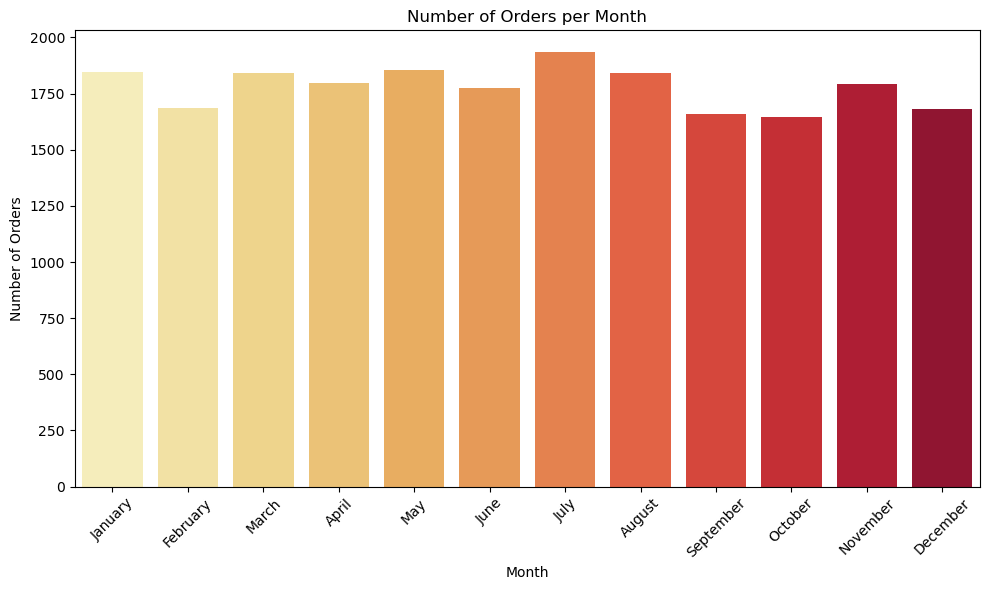

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(data=orders_per_month,x='order_month_name',y='num_orders',palette='YlOrRd')
plt.title('Number of Orders per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

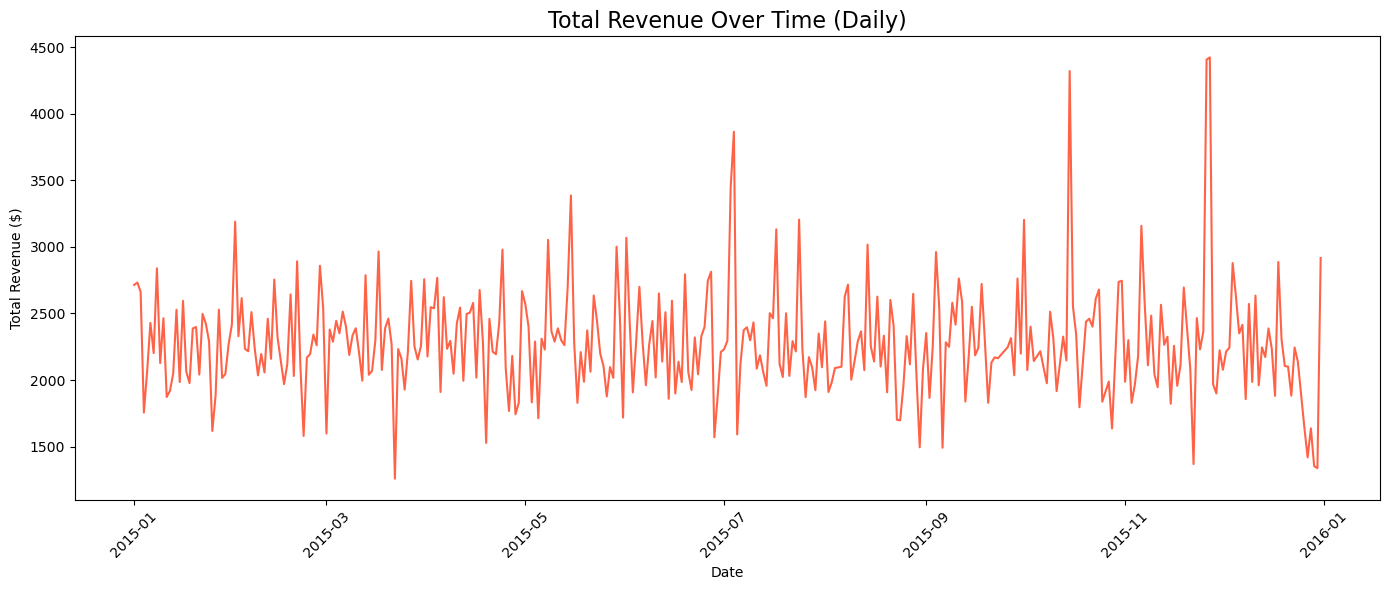

In [12]:
daily_revenue = df.groupby('order_date')['total_price'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_revenue, x='order_date', y='total_price', color='tomato')
plt.title('Total Revenue Over Time (Daily)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

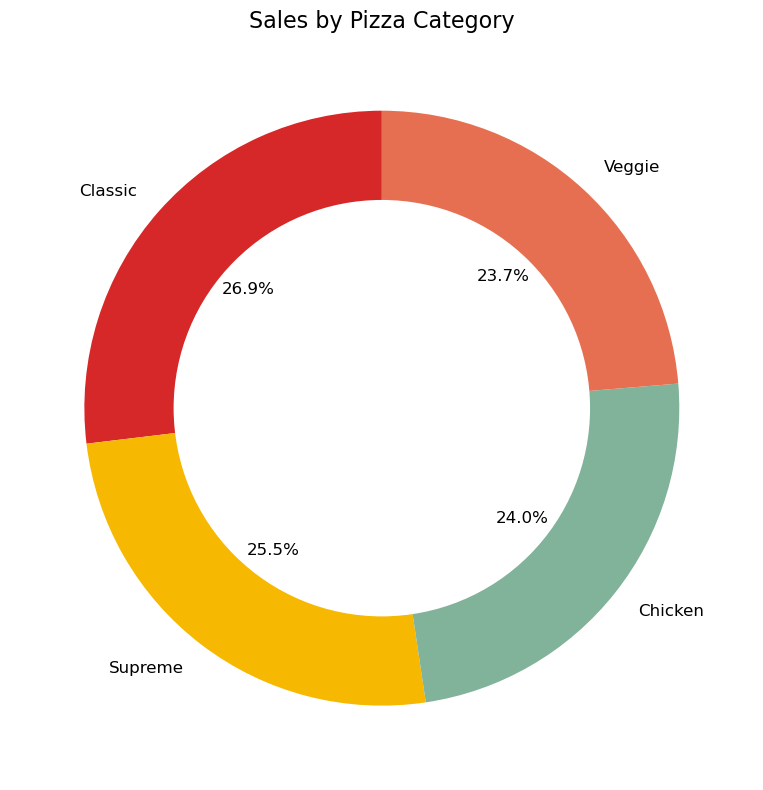

In [ ]:
category_sales = df.groupby('pizza_category')['total_price'].sum().reset_index()
category_sales = category_sales.sort_values(by='total_price', ascending=False)

category_sales.to_excel("category_sales.xlsx", index=False)

plt.figure(figsize=(8, 8))
colors = ['#D62828', '#F7B801', '#81B29A', '#E76F51']  # Pizza-themed colors
wedges, texts, autotexts = plt.pie(
    category_sales['total_price'],
    labels=category_sales['pizza_category'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12}
)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)


plt.title('Sales by Pizza Category', fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\amras\AppData\Local\Temp\ipykernel_21340\582448097.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pizza_sales, x='total_price', y='pizza_name', palette='YlGnBu')
C:\Users\amras\AppData\Local\Temp\ipykernel_21340\582448097.py:11: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\amras\anaconda3\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


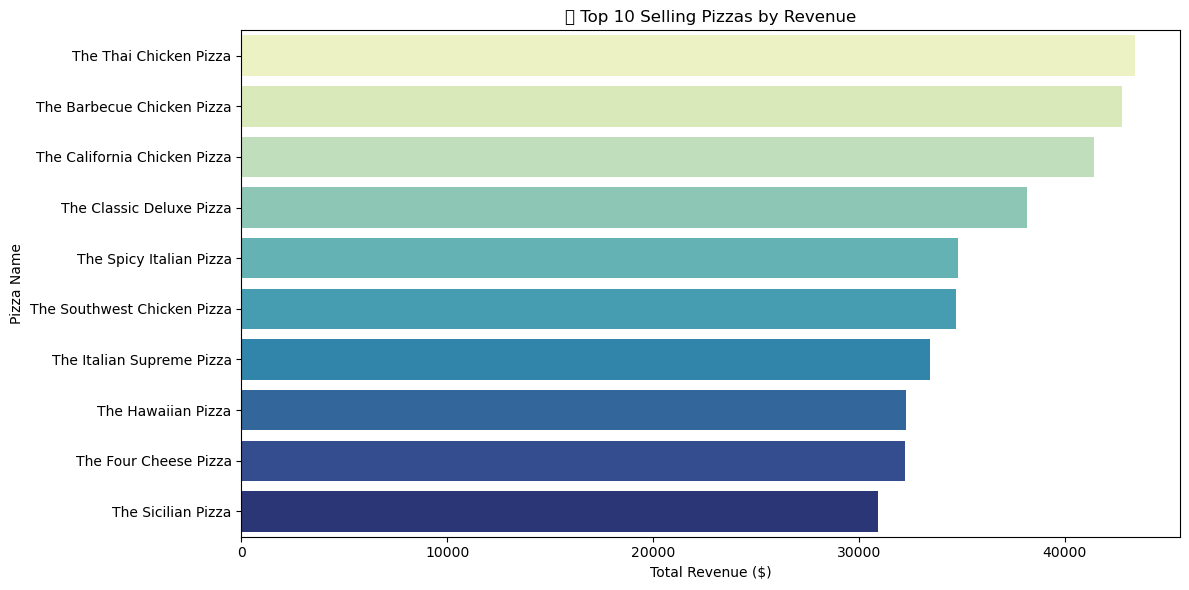

In [ ]:
pizza_sales = df.groupby('pizza_name')['total_price'].sum().reset_index()
pizza_sales = pizza_sales.sort_values(by='total_price', ascending=False).head(10)

pizza_sales.to_excel("pizza_sales.xlsx", index=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=pizza_sales, x='total_price', y='pizza_name', palette='YlGnBu')
plt.title(' Top 10 Selling Pizzas by Revenue')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Pizza Name')
plt.tight_layout()
plt.show()



C:\Users\amras\AppData\Local\Temp\ipykernel_26428\3745524650.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pizza_by_size, x='quantity', y='pizza_size', palette='Oranges_r')


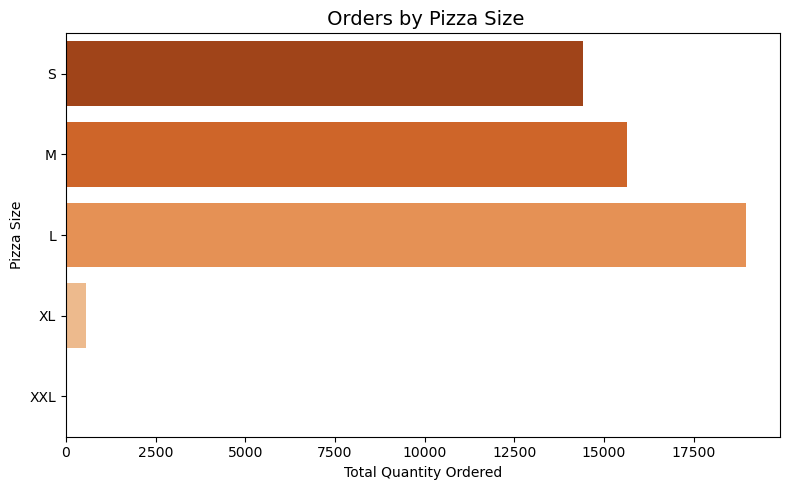

In [4]:
pizza_by_size = df.groupby('pizza_size')['quantity'].sum().reset_index()

size_order = ['S', 'M', 'L','XL','XXL']

pizza_by_size['pizza_size'] = pd.Categorical(pizza_by_size['pizza_size'], categories=size_order, ordered=True)
pizza_by_size = pizza_by_size.sort_values('pizza_size')

pizza_by_size.to_excel('pizza_by_size.xlsx',index=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=pizza_by_size, x='quantity', y='pizza_size', palette='Oranges_r')
plt.title(' Orders by Pizza Size', fontsize=14)
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Pizza Size')
plt.tight_layout()
plt.show()

C:\Users\amras\AppData\Local\Temp\ipykernel_21340\3740080311.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_sales, x='day_of_week', y='total_price', palette='RdYlGn')


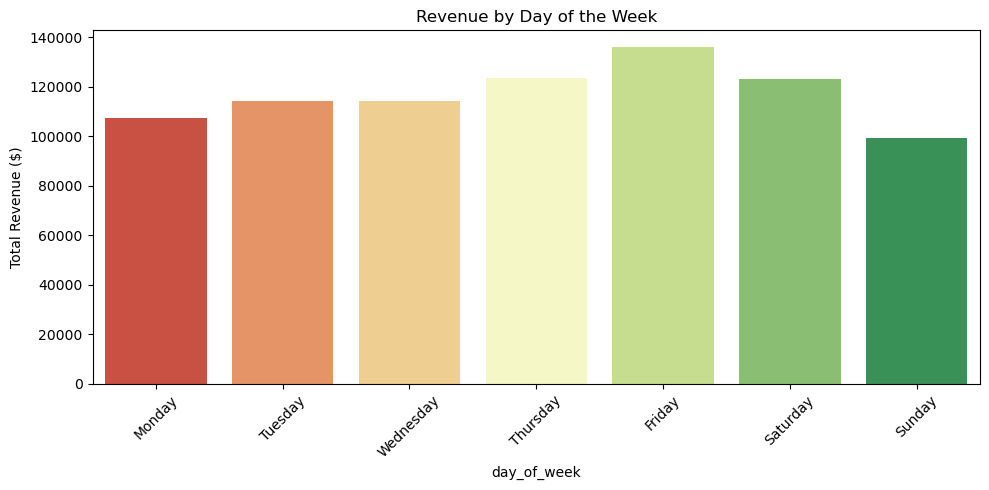

In [27]:
df['day_of_week'] = df['order_date'].dt.day_name()
day_sales = df.groupby('day_of_week')[['total_price', 'quantity']].sum().reset_index()


weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales['day_of_week'] = pd.Categorical(day_sales['day_of_week'], categories=weekday_order, ordered=True)
day_sales = day_sales.sort_values('day_of_week')

day_sales.to_excel('day_sales.xlsx',index=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=day_sales, x='day_of_week', y='total_price', palette='RdYlGn')
plt.title('Revenue by Day of the Week')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\amras\AppData\Local\Temp\ipykernel_21340\1526688629.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aov_by_month = df.groupby('month').apply(lambda x: x['total_price'].sum() / x['order_id'].nunique()).reset_index(name='avg_order_value')


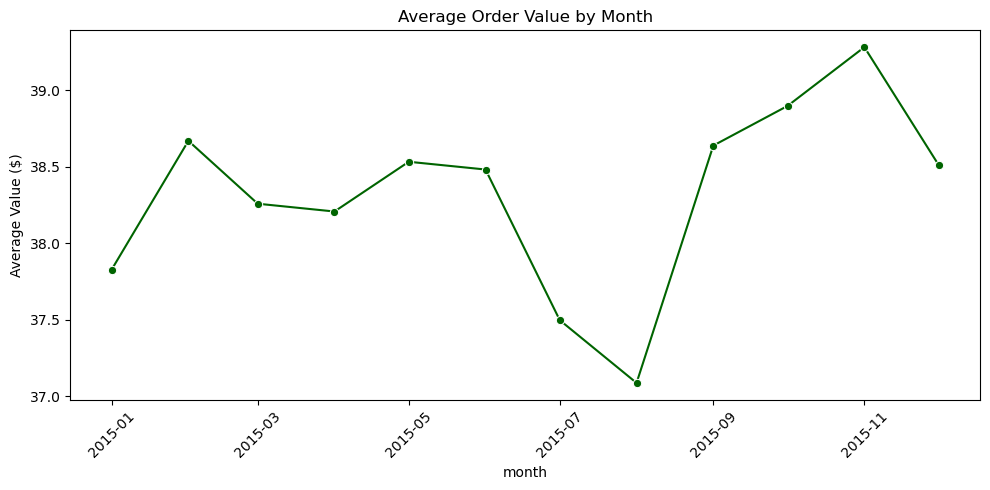

In [29]:
df['month'] = df['order_date'].dt.to_period('M').dt.to_timestamp()
aov_by_month = df.groupby('month').apply(lambda x: x['total_price'].sum() / x['order_id'].nunique()).reset_index(name='avg_order_value')


plt.figure(figsize=(10, 5))
sns.lineplot(data=aov_by_month, x='month', y='avg_order_value', marker='o', color='darkgreen')
plt.title('Average Order Value by Month')
plt.ylabel('Average Value ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
